In [57]:
import pandas as pd
import json
from sklearn import linear_model, model_selection
import matplotlib.pyplot as plt

In [8]:
with open('watches.json', 'r') as fh:
    data = json.load(fh)

In [37]:
price = data[0]['price']
rating = data[0]['rating']
offer = data[0]['offer']
buyer = data[0]['buyer']


In [47]:
df = pd.DataFrame(data={'price': price, 'rating':rating, 'offer':offer, 'buyer':buyer})
data = df.values
y = data[:, 0:1]
x = data[:, 1:]

In [49]:
# splitting data into train and test data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.3, random_state=42)

In [51]:
# sklearn linear regression
lgr = linear_model.LinearRegression()
lgr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lgr.intercept_

array([6548.18251541])

In [54]:
lgr.coef_

array([[-2.42187437e+01, -9.89650840e-02, -1.05312113e+03]])

In [55]:
y_sklearn = lgr.predict(x_test)

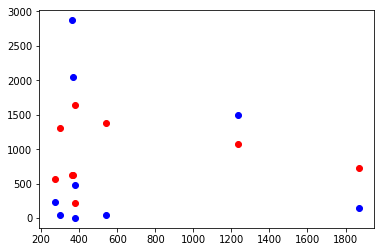

In [59]:
fig, aux = plt.subplots()
aux.plot(x_test[:, 1:2], y_test, 'bo', x_test[:, 1:2], y_sklearn, 'ro')
plt.show()

In [60]:
lgr.predict(x_test[0:1, :])

array([[1636.93966523]])

In [62]:
y_test[0]

array([484.])

In [64]:
x_test[1:2, :]

array([[ 69., 369.,   4.]])

In [65]:
lgr.predict(x_test[1:2, :])

array([[628.08654717]])

In [69]:
y_test[1]

array([2045.])

In [70]:
x_test[2:3, :]

array([[ 50. , 299. ,   3.8]])

In [71]:
lgr.predict(x_test[2:3, :])

array([[1305.79446017]])